In [18]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [2]:
df = pd.read_csv("df23fin.csv")

In [3]:
df.head()

,Address,County,Full,Date,Full Market Price,VAT exclusive,Latitude,Longitude,Price
0,"15 ST JOHNS TERRACE, OLD YOUGHAL RD, CORK CITY",Cork,"15 ST JOHNS TERRACE, OLD YOUGHAL RD, CORK CITY...",2023-01-01,1,0,51.911373,-8.442231,160000.0
1,"2 KINGS TERRACE, CORK CITY, CORK",Cork,"2 KINGS TERRACE, CORK CITY, CORK, Cork",2023-01-01,1,0,51.901490,-8.463452,180000.0
2,"22 COVE ST, CORK CITY, CORK",Cork,"22 COVE ST, CORK CITY, CORK, Cork",2023-01-01,1,0,51.895019,-8.475927,120000.0
3,"3 PARK HILL, SKEHARD RD, CORK",Cork,"3 PARK HILL, SKEHARD RD, CORK, Cork",2023-01-01,1,0,51.886775,-8.427577,320000.0
4,"4 SULLIVANS LANE, BARRACK ST, CORK",Cork,"4 SULLIVANS LANE, BARRACK ST, CORK, Cork",2023-01-01,1,0,51.892899,-8.478891,80000.0


In [10]:
#select only numerical columns
testcol = df[['Latitude', 'Longitude', 'Price']]

In [12]:
#only Dublin subset
dub = testcol[(testcol['Latitude'] >= 53.2595) & (testcol['Latitude'] <= 53.4135) &
                 (testcol['Longitude'] >= -6.40) & (testcol['Longitude'] <= -6.04)]

In [20]:
clustering = linkage(dub, method="average", metric="euclidean")

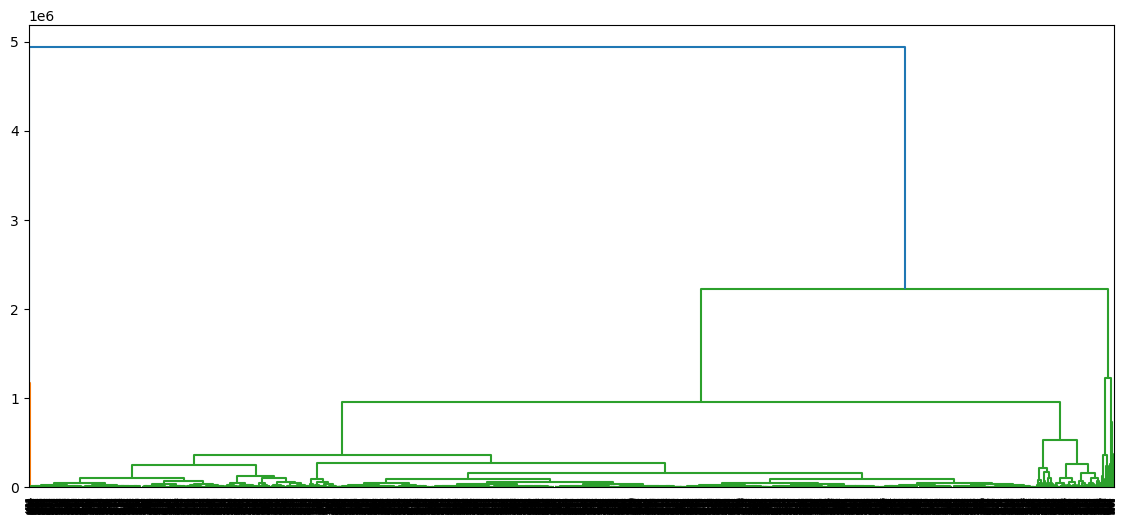

In [21]:
dendrogram(complete_clustering)
plt.show()

/var/folders/10/lrrxrdnx2wnbvf5gl69k7ss40000gn/T/ipykernel_4416/3594814234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dub["Cluster"] = cluster_labels


<Axes: xlabel='Cluster', ylabel='Price'>

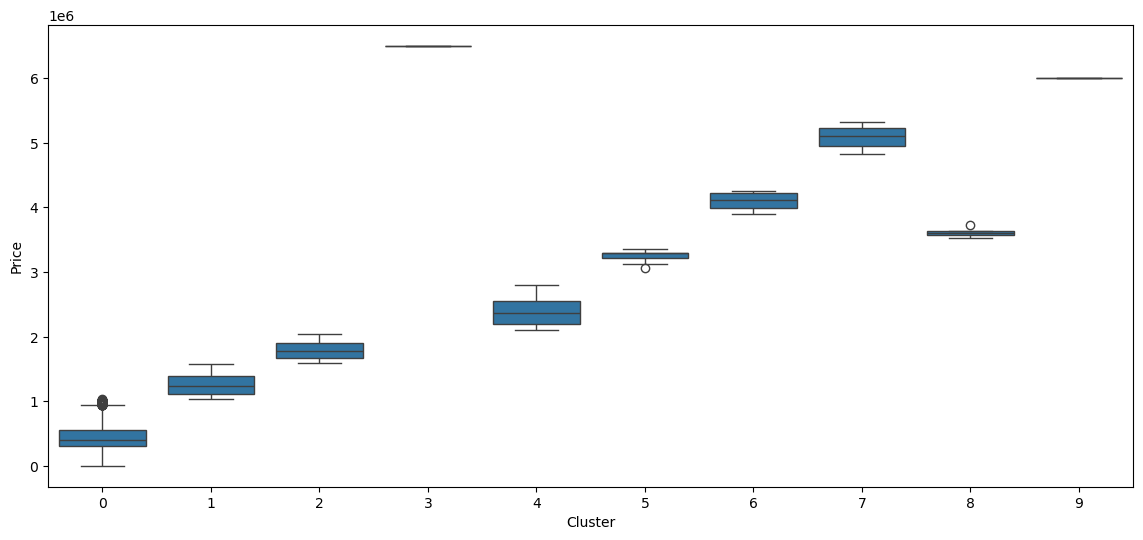

In [25]:
cluster_labels = cut_tree(clustering, n_clusters=10).reshape(-1, )
dub["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='Price', data=dub)

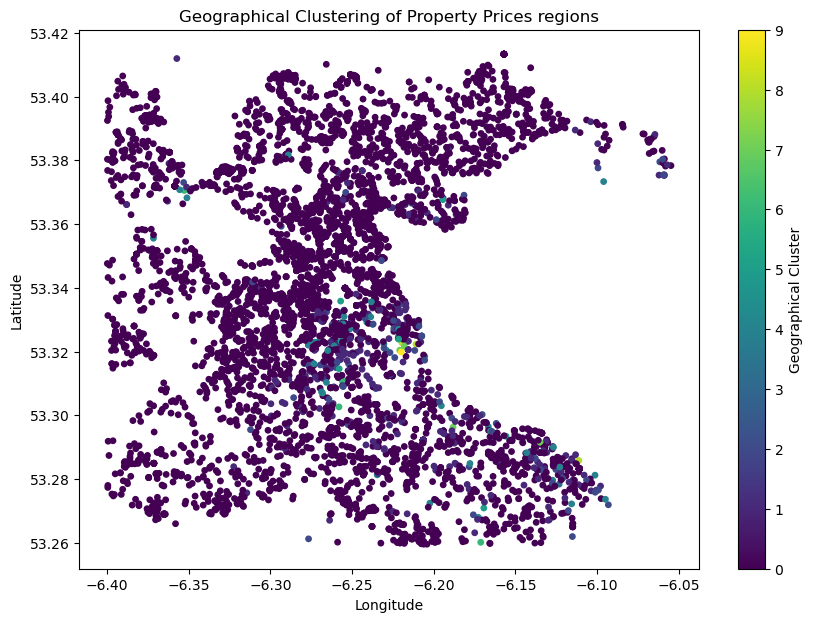

In [27]:
#only Dublin
plt.figure(figsize=(10, 7))
plt.scatter(dub['Longitude'], dub['Latitude'], c=dub['Cluster'], cmap='viridis', s=15)
plt.colorbar().set_label('Geographical Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Clustering of Property Prices regions')
plt.grid(False)
plt.show()